In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# load the data and check first few entries
df = pd.read_csv('monatszahlen2209_verkehrsunfaelle.csv')
df.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERÄND_VORMONAT_PROZENT,VERÄND_VORJAHRESMONAT_PROZENT,ZWÖLF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN


In [3]:
# get the list of column names (this would be helpful later)
df_colnames = list(df.columns)
df_colnames

['MONATSZAHL',
 'AUSPRÄGUNG',
 'JAHR',
 'MONAT',
 'WERT',
 'VORJAHRESWERT',
 'VERÄND_VORMONAT_PROZENT',
 'VERÄND_VORJAHRESMONAT_PROZENT',
 'ZWÖLF_MONATE_MITTELWERT']

In [4]:
# find all the unique accident categories
accident_cats = df['MONATSZAHL'].unique()
accident_cats

array(['Alkoholunfälle', 'Fluchtunfälle', 'Verkehrsunfälle'], dtype=object)

In [39]:
# looking at the 'MONAT' column, we can see that rows with values that are 'Summe' reflect the sum of accidents per
# year for each category. we also only want 'insgesamt' since this reflects the total 

acc_subset = df[(df['MONATSZAHL'] == accident_cats[0]) & (df['MONAT'] == 'Summe') 
                & (df['AUSPRÄGUNG'] == 'insgesamt')].reset_index()
acc_subset.head()

,index,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERÄND_VORMONAT_PROZENT,VERÄND_VORJAHRESMONAT_PROZENT,ZWÖLF_MONATE_MITTELWERT
0,12,Alkoholunfälle,insgesamt,2021,Summe,383.0,430.0,NaN,-10.93,NaN
1,25,Alkoholunfälle,insgesamt,2020,Summe,430.0,434.0,NaN,-0.92,NaN
2,38,Alkoholunfälle,insgesamt,2019,Summe,434.0,398.0,NaN,9.05,NaN
3,51,Alkoholunfälle,insgesamt,2018,Summe,398.0,409.0,NaN,-2.69,NaN
4,64,Alkoholunfälle,insgesamt,2017,Summe,409.0,301.0,NaN,35.88,NaN


In [26]:
# created a reusable function that will plot what we need

def plot_totals(acc):
    sns.set(style="ticks")
    figure(figsize=(10, 6), dpi=100)
    
    acc_subset = df[(df['MONATSZAHL'] == acc) & (df['MONAT'] == 'Summe') & (df['AUSPRÄGUNG'] == 'insgesamt')].reset_index()
    
    l_plot = sns.lineplot(data=acc_subset, x='JAHR', y='WERT', marker='*', linewidth=2, markersize=10)

    plot_name = 'Total Number of ' + acc + ' Accidents per Year'
    l_plot.set(title=plot_name)
    
    for x, y in zip(acc_subset['JAHR'], acc_subset['WERT']):
        plt.text(x = x+0.5, y = y-10, s = '{:.0f}'.format(y), color='black', fontsize=10)

    plt.xticks(np.arange(2000, 2022, 1.0), fontsize=10, rotation=45)
    plt.xlabel('Year')
    plt.ylabel('Number of Accidents')
    plt.grid()
    
    filename = acc + '_Accidents_per_Year.png'
    plt.savefig(filename)
    

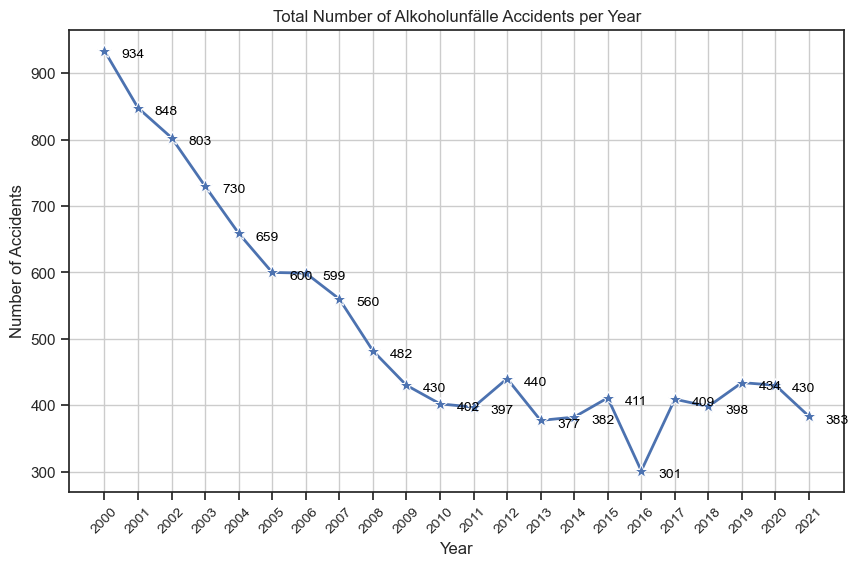

In [27]:
# 'Alkoholunfälle' plot

plot_totals('Alkoholunfälle')

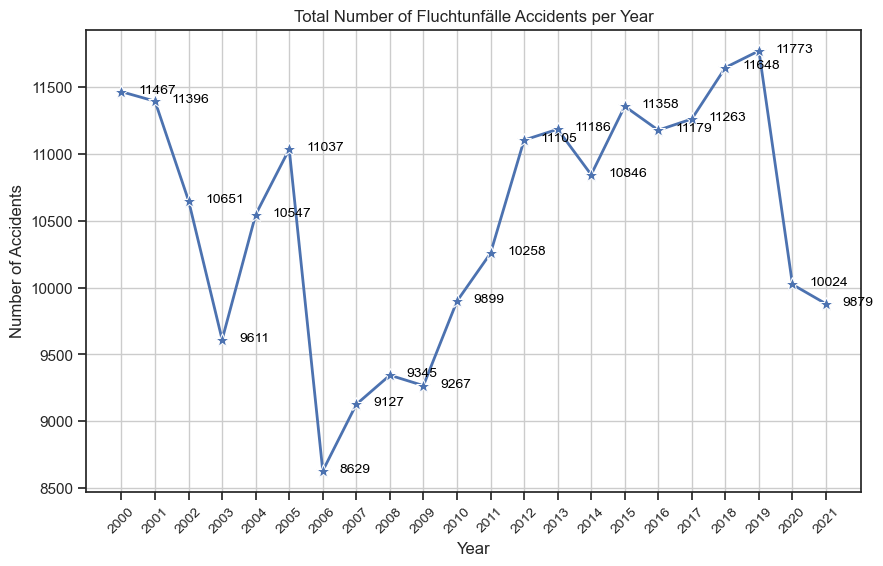

In [30]:
# 'Fluchtunfälle' plot

plot_totals('Fluchtunfälle')

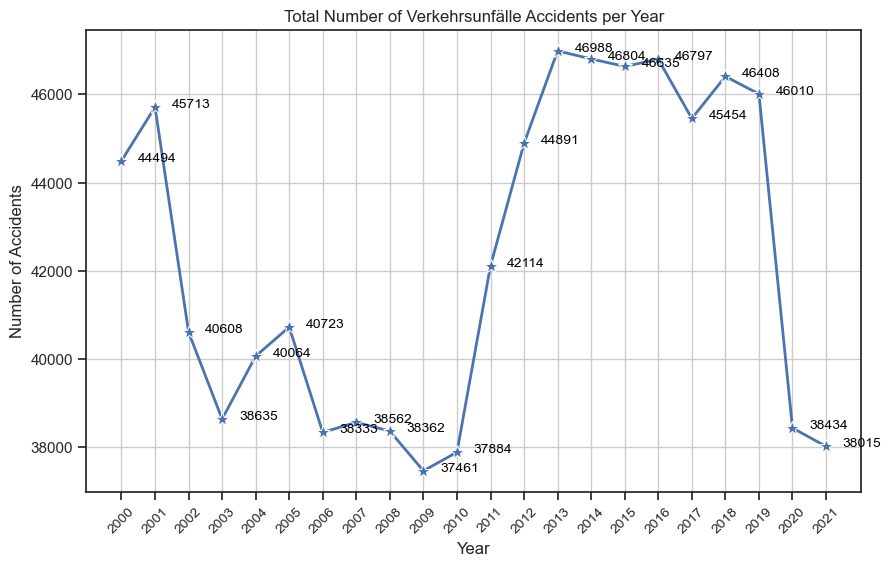

In [29]:
# 'Verkehrsunfälle' plot

plot_totals('Verkehrsunfälle')